In [61]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
import os
import numpy as np
import cv2
from keras.utils import load_img
# importing os.path module
import os.path

In [62]:
# Manually naming the classes
# classes = ['bell pepper bad', 'bell pepper healthy', 'potato early blight', 'potato healthy', 'potato late blight', 'tomato target spot', 'tomato mosaic virus', 'tomato yellowleaf curl virus', 'tomato bacteria spot', 'tomato early blight', 'tomato healthy', 'tomato late blight', 'tomato leaf mold', 'tomato septoria leaf spot', 'tomato spider mites two spotted spider mite']

# A much better way to get the names of the classes. (Since the classes are stored in different folders.)
# classes = os.listdir('Dataset')
classes = ['car', 'crow', 'tree', 'human', 'trash panda', 'monkey']
len(classes) # Finding the number of classes.


6

In [63]:
# let's build the CNN model

cnn = Sequential()

#Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(256, 256, 3)))

#Pooling
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# 2nd Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu"))

# 2nd Pooling layer
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# Flatten the layer
cnn.add(Flatten())

# Fully Connected Layers
cnn.add(Dense(activation = 'relu', units = 180))
# cnn.add(Dense(activation = 'sigmoid', units = 15)) # This is for the big dataset
cnn.add(Dense(activation = 'sigmoid', units = 6)) # This is for the potato only dataset


# Compile the Neural network
# cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 123008)            0         
                                                                 
 dense_6 (Dense)             (None, 180)              

# Looking at the Data we Got

In [64]:
# make it all same size, run once if there is no file available




 
# Path
path = 'SplitDataset'

# Check whether the
# specified path is an
# existing directory or not
isdir = os.path.isdir(path)
print(isdir)
    
    
if isdir == False:
    import splitfolders
    splitfolders.ratio(r"dataset", output="SplitDataset", seed=1337, ratio=(.8, .1, .1), group_prefix=None)
# # Path
# path = 'SplitDataset'
 
# # Check whether the
# # specified path is an
# # existing directory or not
# isdir = os.path.isdir(path)
# print(isdir)

True


In [65]:
# Fitting the CNN to the images
# The function ImageDataGenerator augments your image by iterating through image as your CNN is getting ready to process that image

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)  #Image normalization.

In [66]:
training_set = train_datagen.flow_from_directory(r"SplitDataset\train",
                                                 target_size = (256, 256),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

validation_generator = test_datagen.flow_from_directory(r"SplitDataset\val",
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical')

test_set = test_datagen.flow_from_directory(r"SplitDataset\test",
                                            target_size = (256, 256),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 13552 images belonging to 6 classes.
Found 1692 images belonging to 6 classes.
Found 1697 images belonging to 6 classes.


In [67]:
train_examples, train_labels = next(iter(training_set))
validation_examples, validation_labels = next(iter(validation_generator))
test_examples, test_labels = next(iter(test_set))

C:\Users\ngshe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\text.py:1242: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


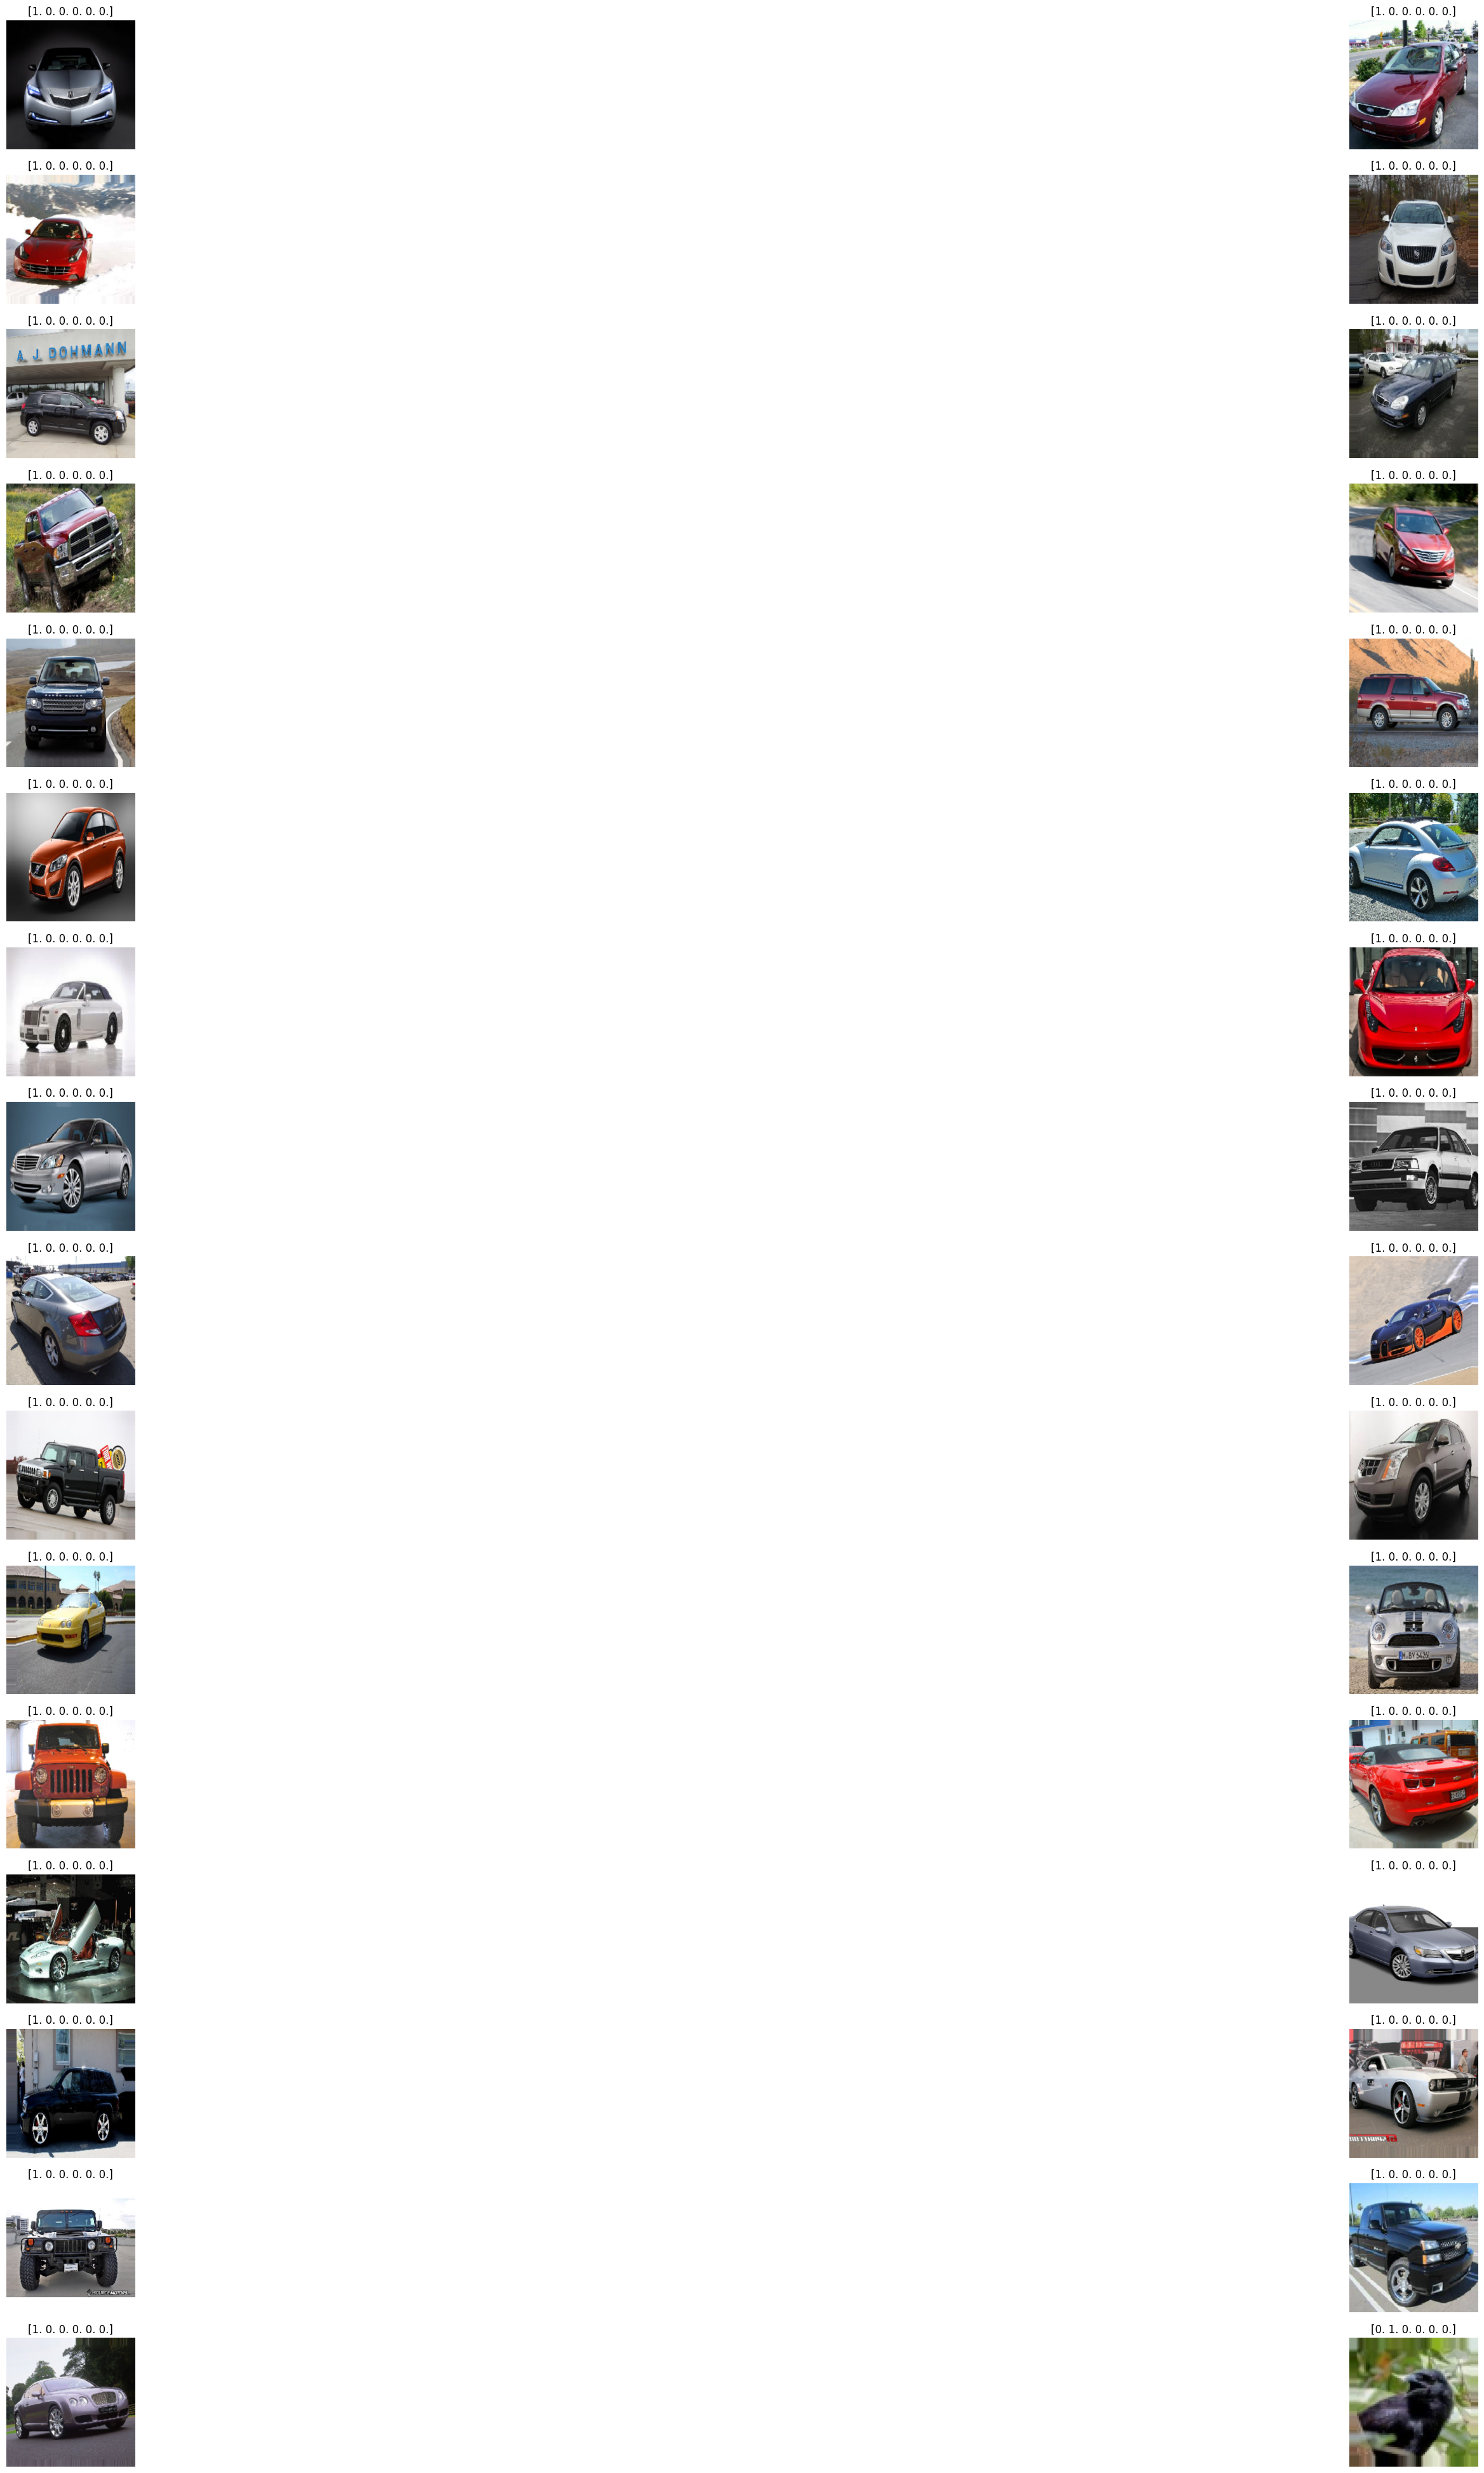

In [68]:
fig = plt.figure(figsize=(50, 50))

rows = 16
columns = 2

for i in range(len(train_examples)):
    fig.add_subplot(rows, columns, i + 1)
    plt.imshow(train_examples[i])
    plt.axis('off')
    plt.title(train_labels[i])

[1. 0. 0. 0. 0. 0.]
car
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)


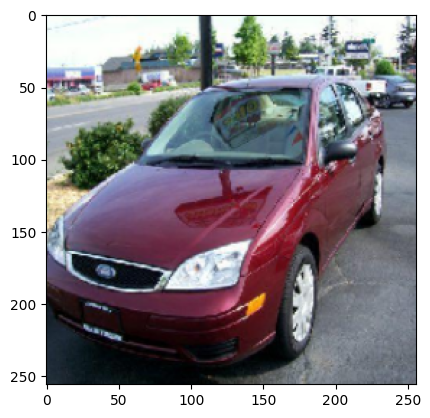

In [69]:
plt.imshow(train_examples[1])
print(train_labels[1])
print(classes[np.argmax(train_labels[1])])
print(train_examples[1].shape)

print('============')

print(validation_examples[1].shape)

print('============')

print(test_examples[1].shape)


# Training the Model

In [70]:
# Please change the number of epochs as necessary. One epoch takes around 5 minutes. 
# You need minimum 2 epochs to show the output at the graphs at the end of this notebook.       


def loadmodelfunction(): # to load the model
  model = tf.keras.models.load_model('Model')
  
  loss, accuracy_d = model.evaluate(test_examples, test_labels, verbose=2)
  print("Restored model, accuracy: {:5.2f}%".format(100 * accuracy_d))
  model.summary()


def trainmodel(): # train models from dataset
  history = cnn.fit(training_set,
                    steps_per_epoch = 163,
                    epochs = 20,
                    validation_data = validation_generator,
                    validation_steps = 624)
  print(history.history.keys())
  # summarize history for accuracy
  plt.plot(history.history['accuracy'])
  # plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  # plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
                  
def savemodel(): # save model
  cnn.save('Model')


# def prediction():


# def plotprediction(): 

#     # Prediction
#   # Evaluate the model on the test data using `evaluate`
#   print("Evaluate on test data")
#   results = cnn.evaluate(test_set, batch_size=32)
#   print("test loss, test acc:", results)

#   # Generate predictions (probabilities -- the output of the last layer)
#   # on new data using `predict`
#   print("Generate predictions for 3 samples")
#   predictions = cnn.predict(test_set)
#   print("predictions shape:", predictions.shape)

#   plt.imshow(test_examples[14])

#   print(predictions[14])
#   print(classes[np.argmax(predictions[14])])

#   #To plot the predictions


#   # list all data in history
#   print(history.history.keys())
#   # summarize history for accuracy
#   plt.plot(history.history['accuracy'])
#   # plt.plot(history.history['val_accuracy'])
#   plt.title('model accuracy')
#   plt.ylabel('accuracy')
#   plt.xlabel('epoch')
#   plt.legend(['train', 'test'], loc='upper left')
#   plt.show()
#   # summarize history for loss
#   plt.plot(history.history['loss'])
#   # plt.plot(history.history['val_loss'])
#   plt.title('model loss')
#   plt.ylabel('loss')
#   plt.xlabel('epoch')
#   plt.legend(['train', 'test'], loc='upper left')
#   plt.show()


def main(): # load or save
  
  loadmodelissuccessful = bool(False) #set the boolean as false

  while loadmodelissuccessful == False:
    try:
      loadmodelfunction()
      print("The model is succesfully loaded")
      loadmodelissuccessful = True
      print(loadmodelissuccessful)
      print("after loading")
    
      # plotprediction()
      # return loadmodelissuccessful
      
      
      #try loading the trained model, if it was not loading then

    except:
      print("loading is not successful, training now...")
      trainmodel()
      savemodel()
      loadmodelissuccessful = True
      print(loadmodelissuccessful)
      print("training")
      # plotprediction()
      # return loadmodelissuccessful
      # then train model again

  

main()
print("DONE!")
print("successful")



1/1 - 0s - loss: 7.0592e-04 - accuracy: 1.0000 - 212ms/epoch - 212ms/step
Restored model, accuracy: 100.00%
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 123008)            0         
              

# Prediction

In [71]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = cnn.evaluate(test_set, batch_size=32)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = cnn.predict(test_set)
print("predictions shape:", predictions.shape)



Evaluate on test data
54/54 [==============================] - 9s 169ms/step - loss: 1.7320 - accuracy: 0.0801
test loss, test acc: [1.731971263885498, 0.08014142513275146]
Generate predictions for 3 samples
54/54 [==============================] - 9s 167ms/step
predictions shape: (1697, 6)


[0.52837527 0.4843934  0.49420655 0.49163634 0.50460345 0.5376994 ]
monkey


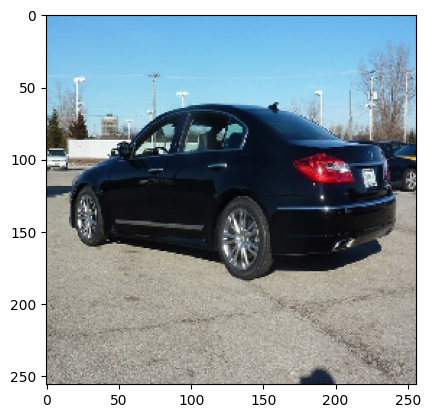

In [72]:
plt.imshow(test_examples[14])

print(predictions[14])
print(classes[np.argmax(predictions[14])])

In [73]:
#To plot the predictions

# list all data in history


# Convert to .h5

In [74]:
# Execute the cell where it gives the accuracy and loss
# Save the model as a .h5 file.

# After you export as h5 file, give me the h5 file. I'll replace the old one in GCP with the new one.
# Then, try to convert the model into an open vino thingy and test in your computer first.
# If can work, find out how can you make it work in GCP.

In [75]:
# import numpy as np 
# import h5py

In [76]:
# matrix1 = np.random.random(size = (1000, 1000))
# matrix2 = np.random.random(size = (1000, 100))

In [77]:
# with h5py.File('D:\My file\heng ee\Heng Ee Robotic\AI bootcamp 2021/hdf5_data.h5', 'w' ) as hdf:
#     hdf.create_dataset('dataset1', data=matrix1)
#     hdf.create_dataset('dataset2', data=matrix2)

FileNotFoundError: [Errno 2] Unable to create file (unable to open file: name = 'D:\My file\heng ee\Heng Ee Robotic\AI bootcamp 2021/hdf5_data.h5', errno = 2, error message = 'No such file or directory', flags = 13, o_flags = 302)

# Convert the TensorFlow model with OpenVINO Model Optimizer

## Saving the Tensorflow Model

In [ ]:
# save the trained model - a new folder flower will be created
# and the file "saved_model.pb" is the pre-trained model
# model_dir = "D:\heng ee\Heng Ee Robotic\AI bootcamp 2021\Project_Potato-Disease-Detection"
# model_fname = f"{model_dir}/disease-detection"
# cnn.save(model_fname)

In [ ]:
# from pathlib import Path
# import sys
# from model_optimizer import mo_tf

# # The paths of the source and converted models
# model_name = "crop_disease_detection"
# model_path = Path(model_fname)
# ir_data_type = "FP16"
# ir_model_name = "crop_disease_detection_ir"

# # Get the path to the Model Optimizer script
# mo_path = str(Path(mo_tf.__file__))

# # Construct the command for Model Optimizer
# mo_command = f""""{sys.executable}"
#                  "{mo_path}" 
#                  --saved_model_dir "{model_fname}"
#                  --input_shape "[1,180,180,3]" 
#                  --data_type "{ir_data_type}" 
#                  --output_dir "{model_fname}"
#                  --model_name "{ir_model_name}"
#                  """
# mo_command = " ".join(mo_command.split())
# print("Model Optimizer command to convert TensorFlow to OpenVINO:")
# print(mo_command)


In [ ]:
# # Run the Model Optimizer (overwrites the older model)
# print("Exporting TensorFlow model to IR... This may take a few minutes.")
# mo_result = %sx $mo_command
# print("\n".join(mo_result))

## Preprocessing Image Function

In [ ]:
# from PIL import Image

# def pre_process_image(imagePath, img_height=180):
#     # Model input format
#     n, c, h, w = [1, 3, img_height, img_height]
#     image = Image.open(imagePath)
#     image = image.resize((h, w), resample=Image.BILINEAR)

#     # Normalize to keep data between 0 - 1
#     image = np.array(image) 

#     # Change data layout from HWC to CHW
#     image = image.transpose((2, 0, 1))
#     input_image = image.reshape((n, c, h, w))

#     return input_image

## OpenVINO Inference Engine Setup

In [ ]:
# from openvino.inference_engine import IECore

# classes = classes

# model_xml = f"{model_fname}/crop_disease_detection.xml"

# # Load network to the plugin
# ie = IECore()
# net = ie.read_network(model=model_xml)

# # Neural Compute Stick
# # exec_net = ie.load_network(network=net, device_name="MYRIAD")
# exec_net = ie.load_network(network=net, device_name="CPU")

# del net # ???

# input_layer = next(iter(exec_net.input_info))
# output_layer = next(iter(exec_net.outputs))

## Run the Inference Step

In [ ]:
# # This is the code from references
# # import urllib

# # # Run the Inference on the Input image...
# # inp_img_url = "https://upload.wikimedia.org/wikipedia/commons/4/48/A_Close_Up_Photo_of_a_Dandelion.jpg"
# # OUTPUT_DIR = "output"
# # inp_file_name = f"{OUTPUT_DIR}/A_Close_Up_Photo_of_a_Dandelion.jpg"

# # os.makedirs(OUTPUT_DIR, exist_ok=True)

# # # Download the image from the storage
# # urllib.request.urlretrieve(inp_img_url, inp_file_name)

# #Pre-process the image and get it ready for inference.
# input_image = pre_process_image(test_image)

# res = exec_net.infer(inputs={input_layer: input_image})
# res = res[output_layer]

# score = tf.nn.softmax(res[0])

# #show the results
# image = Image.open(test_image)
# plt.imshow(image)
# print(
#     "This image most likely belongs to {} with a {:.2f} percent confidence."
#     .format(classes[np.argmax(score)], 100 * np.max(score))
# )